In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


np.random.seed(123)
tf.random.set_seed(123)

# Particle Swarm Optimization

In [2]:
class pso:
    def __init__(
        self,
        fitness_fn,
        pop_size=500,
        dim=2,
        n_iter=300,
        b=0.9,
        c1=0.9,
        c2=0.5,
        x_min=-1,
        x_max=1,
        ):
        self.fitness_fn = fitness_fn
        self.pop_size = pop_size
        self.dim = dim
        self.n_iter = n_iter
        self.b = b
        self.c1 = c1
        self.c2 = c2
        self.x_min = x_min
        self.x_max = x_max
        self.x = self.build_swarm()
        self.p = self.x
        self.f_p = self.fitness_fn(self.x)
        self.fit_history = []
        self.g = self.p[tf.math.argmin(input=self.f_p).numpy()[0]]
        self.v = self.start_velocities()


    def build_swarm(self):
        """Creates the swarm following the selected initialization method. 
        Returns:
            tf.Tensor: The PSO swarm population. Each particle represents a neural
            network. 
        """
        return tf.Variable(
            tf.random.uniform([self.pop_size, self.dim], self.x_min, self.x_max)
        )


    def start_velocities(self):
        """Start the velocities of each particle in the population (swarm). 
        Returns:
            tf.Tensor: The starting velocities.  
        """
        return tf.Variable(
            tf.random.uniform(
                [self.pop_size, self.dim],
                 self.x_min,
                self.x_max ,
            )
        )


    def get_randoms(self):
        """Generate random values to update the particles' positions. 
        Returns:
            _type_: _description_
        """
        return np.random.uniform(0, 1, [2, self.dim])[:, None]

    def update_p_best(self):
        """Updates the *p-best* positions. 
        """
        f_x = self.fitness_fn(self.x)
        self.fit_history.append(tf.reduce_mean(f_x).numpy())
        self.p = tf.where(f_x < self.f_p, self.x, self.p)
        self.f_p = tf.where(f_x < self.f_p, f_x, self.f_p)

    def update_g_best(self):
        """Update the *g-best* position. 
        """
        return self.p[tf.math.argmin(input=self.f_p).numpy()[0]]

    def step(self):
        """It runs ONE step on the particle swarm optimization. 
        """
        r1, r2 = self.get_randoms()
        self.v = (
            self.b * self.v
            + self.c1 * r1 * (self.p - self.x)
            + self.c2 * r2 * (self.g - self.x)
        )
        self.x = tf.clip_by_value(self.x + self.v, self.x_min, self.x_max)
        self.update_p_best()
        self.update_g_best()

    def train(self):
        """The particle swarm optimization. The PSO will optimize the weights according to the losses of the neural network, so this process is actually the neural network training. 
        """
        for i in range(self.n_iter):
            self.step()

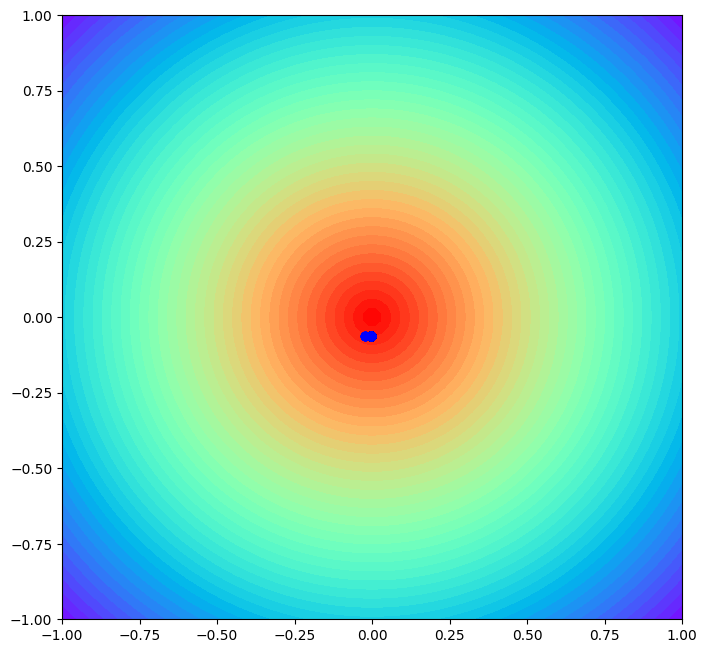

In [3]:
def objective_function(X):
    return tf.math.sqrt(X[:,0]**2 + X[:,1]**2)[:,None]

def fitness_function():
    def f(X):
        return objective_function(X)
    return f

opt = pso(fitness_fn=fitness_function(), n_iter=100)

## Define the grid for future plotting:
xlist = np.linspace(-1.0, 1.0, 100)
ylist = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = - np.sqrt(X**2 + Y**2)


def snapshot(i):
    opt.train()
    plt.contourf(X, Y, Z, cmap='rainbow', levels=50)
    plt.scatter(opt.x[:,0],opt.x[:,1], color='b')

fig = plt.figure(figsize=(8, 8), dpi=100)
anim = animation.FuncAnimation(fig,snapshot,frames=60)
anim.save("PSO_tensorflow.mp4", fps=6)
# anim

In [10]:
from random import randrange

In [15]:
heads = tails = 0
for b in range(1000):
        if randrange(100) < 69: 
            heads = heads + 1 
        else: 
            tails = tails + 1

In [16]:
print(tails)

290


In [18]:
from typing import List
 
# Function to multiply two matrices A and B
def multiply(A: List[List[float]], B: List[List[float]],
             N: int) -> List[List[float]]:
    C = [[0 for _ in range(N)] for _ in range(N)]
    for i in range(N):
        for j in range(N):
            for k in range(N):
                C[i][j] += A[i][k] * B[k][j]
    return C
 
# Function to calculate the power of a matrix
def matrix_power(M: List[List[float]], p: int, n: int) -> List[List[float]]:
    A = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        A[i][i] = 1
    while (p):
        if (p % 2):
            A = multiply(A, M, n)
        M = multiply(M, M, n)
        p //= 2
    return A
 
# Function to calculate the probability of
# reaching F at time T after starting from S
def findProbability(M: List[List[float]], N: int, F: int, S: int,
                    T: int) -> float:
 
    # Storing M^T in MT
    MT = matrix_power(M, T, N)
 
    # Returning the answer
    return MT[F - 1][S - 1]
 
 
# Driver code
if __name__ == "__main__":
 
    # Adjacency matrix
    # The edges have been stored in the row
    # corresponding to their end-point
    G = [[0.1, 0.9, 0, 0], [0.2, 0, 0.8, 0],
         [0.3, 0, 0, 0.7], [0.4, 0, 0, 0.6]]
 
    # N is the number of states
    N = 4
    S = 1
    F = 2
    T = 100
 
    print(
        "The probability of reaching {} at time {}\nafter starting from {} is {}\n"
        .format(F, T, S, findProbability(G, N, F, S, T)))

The probability of reaching 2 at time 100
after starting from 1 is 0.257731958762887

